In [1]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.models import Sequential, load_model, Model,Input
from keras.layers import Dense,GlobalAvgPool2D, Conv2D, MaxPool2D,AvgPool2D, GlobalAveragePooling2D,AveragePooling2D ,Softmax, BatchNormalization, ReLU, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import concatenate,Concatenate
import matplotlib.pyplot as plt
from matplotlib.image import imread 
%matplotlib inline
import pandas as pd
import numpy as np
import cv

In [2]:
# preprocessing the training set
train_data_generation = ImageDataGenerator(rescale=1./255)
training_set = train_data_generation.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted/train',
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary',seed=0)

# preprocessing the testing set
test_data_generation = ImageDataGenerator(rescale=1./255)
testing_set = test_data_generation.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted/val',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)

Found 1174 images belonging to 2 classes.
Found 505 images belonging to 2 classes.


In [3]:
def densenet(img_shape, n_class,f=32):
  repetitions = [6, 12, 24, 16]
  
  def bn_rl_conv(model, f, k=1, s=1, p='same'):
    model = BatchNormalization()(model)
    model = ReLU()(model)
    model = Conv2D(f, k, strides=s, padding=p)(model)
    return model
  
  
  def dense_block(conc, r):
    for i in range(r):
      model = bn_rl_conv(conc, 4*f)
      model = bn_rl_conv(model, f, 3)
      conc = Concatenate()([conc, model])
    return conc
  
  
  def transition_block(model):
    model = bn_rl_conv(model, K.int_shape(model)[-1] // 2)
    model = AvgPool2D(2, strides=2, padding='same')(model)
    return model
  
  
  input = Input(img_shape)
  
  model = Conv2D(64, 7, strides=2, padding='same')(input)
  model = MaxPool2D(3, strides=2, padding='same')(model)
  
  for r in repetitions:
    d = dense_block(model, r)
    model = transition_block(d)
  
  model = GlobalAvgPool2D()(d)
  
  output = Dense(n_class, activation='softmax')(model)
  
  model = Model(input, output)
  return model

In [4]:
model= densenet([224,224,3],2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [5]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x=training_set, validation_data=testing_set, epochs=50)


Epoch 1/50
37/37 [==============================] - 267s 7s/step - loss: 0.9542 - accuracy: 0.6831 - val_loss: 2.6422 - val_accuracy: 0.4356
Epoch 2/50
37/37 [==============================] - 275s 7s/step - loss: 0.4806 - accuracy: 0.7658 - val_loss: 0.8287 - val_accuracy: 0.3822
Epoch 3/50
37/37 [==============================] - 293s 8s/step - loss: 0.4774 - accuracy: 0.7777 - val_loss: 13.0025 - val_accuracy: 0.6178
Epoch 4/50
37/37 [==============================] - 259s 7s/step - loss: 0.5431 - accuracy: 0.7734 - val_loss: 1.5214 - val_accuracy: 0.5465
Epoch 5/50
37/37 [==============================] - 259s 7s/step - loss: 0.4156 - accuracy: 0.8288 - val_loss: 1.3441 - val_accuracy: 0.4277
Epoch 6/50
37/37 [==============================] - 253s 7s/step - loss: 0.4274 - accuracy: 0.8118 - val_loss: 0.7817 - val_accuracy: 0.4337
Epoch 7/50
37/37 [==============================] - 261s 7s/step - loss: 0.4238 - accuracy: 0.8041 - val_loss: 0.6676 - val_accuracy: 0.5386
Epoch 8/50
3

In [6]:
model.save('dense.h5')
weight = load_model('dense.h5')


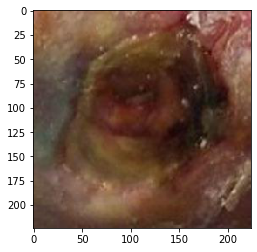

In [7]:
image = load_img('/media/fatmaosama/New Volume/database/PartB_DFU_Dataset/Infection/Aug-Positive/000587_11.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [8]:
result = weight.predict(image)

result

array([[1., 0.]], dtype=float32)

In [9]:
#Preprocessing
train_data_generation1 = ImageDataGenerator(rescale=1./255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)

#preprocessing the training set                                          
training_set1 = train_data_generation1.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted/train',
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary'
                                                         ,seed=0)

#preprocessing the testing set
test_data_generation1 = ImageDataGenerator(rescale=1./255)
testing_set1 = test_data_generation1.flow_from_directory('/home/fatmaosama/Desktop/GP/PartA_Splitted/val',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=0)



Found 1174 images belonging to 2 classes.
Found 505 images belonging to 2 classes.


In [11]:
model1= densenet([224,224,3],2)
model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model1.fit(x=training_set1, validation_data=testing_set1, epochs=50)

Epoch 1/50
37/37 [==============================] - 264s 7s/step - loss: 0.8796 - accuracy: 0.7164 - val_loss: 0.9070 - val_accuracy: 0.4772
Epoch 2/50
37/37 [==============================] - 256s 7s/step - loss: 0.5322 - accuracy: 0.7504 - val_loss: 0.5926 - val_accuracy: 0.6950
Epoch 3/50
37/37 [==============================] - 260s 7s/step - loss: 0.4670 - accuracy: 0.7939 - val_loss: 0.7354 - val_accuracy: 0.5723
Epoch 4/50
37/37 [==============================] - 266s 7s/step - loss: 0.4984 - accuracy: 0.8007 - val_loss: 0.7235 - val_accuracy: 0.4713
Epoch 5/50
37/37 [==============================] - 260s 7s/step - loss: 0.4808 - accuracy: 0.8296 - val_loss: 0.7673 - val_accuracy: 0.5446
Epoch 6/50
37/37 [==============================] - 255s 7s/step - loss: 0.4705 - accuracy: 0.7709 - val_loss: 0.7853 - val_accuracy: 0.5525
Epoch 7/50
37/37 [==============================] - 255s 7s/step - loss: 0.4545 - accuracy: 0.7973 - val_loss: 0.9911 - val_accuracy: 0.5762
Epoch 8/50
37

In [12]:
model1.save('dense1.h5')
weight1 = load_model('dense1.h5')


In [13]:
result1 = weight1.predict(image)

result1

array([[1., 0.]], dtype=float32)